## All Cancer Integration Notebook 04: Immune Cell Composition 

This is the Jupyter Notebook to compute the immune cell composition of the meta AnnData object from all datasets. 

In [1]:
import glasbey
import scanpy as sc
import pandas as pd
import seaborn as sns
from rich import print
import matplotlib.pyplot as plt

## 1. Load all elements

In [2]:
adata_annotated = sc.read_h5ad(
    '/scratch/user/s4543064/Xiaohan_Summer_Research/write/08_all_cancer_clean/all_cancer_meta_anndata_scVI_pca_cluster_celltypist_high.h5ad'
)

In [13]:
adata_annotated_unknown = adata_annotated.copy()
adata_annotated_unknown

AnnData object with n_obs × n_vars = 1300958 × 559
    obs: 'cancer_type', 'dataset', 'tissue', 'uni_barcode', 'disease_progression', 'sample_barcode', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'filter_rna', 'cell_type_from_paper', 'malignant_from_paper', 'age_months', 'age', 'sex', 'recurrent', 'cancer_subtype', 'metastatic', '_scvi_batch', '_scvi_labels', 'major_cancer_type', 'major_cancer_type_order', 'cancer_type_order', 'celltypist_majority_voting', 'filtered_cell_labels', 'filtered_cell_labels_order', 'leiden_pca'
    var: 'gene_ids', 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'cancer_type_colors', 'cancer_type_order_colors', 'filtered_cell_labels_order_colors', 'hvg', 'leiden', 'leiden_pca_colors', 'major_cancer_type_order_colors', 'neighbors', 'pca', 'sample_barcode_c

`sarcoma` samples: ['GSE140819']
[
    [
    'GSM4186992_HTAPP-951-SMP-4652_TST-V2_channel1',
    'GSM4186994_HTAPP-951-SMP-4652_CST-V3_channel1',
    'GSM4186993_HTAPP-951-SMP-4652_TST-V3_channel1',
    'GSM4186995_HTAPP-975-SMP-4771_TST-V3_channel1'
]
]

`glioblastoma` samples: ['GSE140819']
['GSM4186982_HTAPP-443-SMP-5491_CST_channel1']

In [16]:
# Update the cancer type info
sarcoma_sample_barcodes = [
    'GSM4186992_HTAPP-951-SMP-4652_TST-V2_channel1',
    'GSM4186994_HTAPP-951-SMP-4652_CST-V3_channel1',
    'GSM4186993_HTAPP-951-SMP-4652_TST-V3_channel1',
    'GSM4186995_HTAPP-975-SMP-4771_TST-V3_channel1',
]

glioblastoma_sample_barcodes = [
    'GSM4186982_HTAPP-443-SMP-5491_CST_channel1',
]

adata_annotated_unknown.obs['major_cancer_type'] = adata_annotated_unknown.obs['major_cancer_type'].astype(str)

# Change the major_cancer_type
for code in sarcoma_sample_barcodes:
    adata_annotated_unknown.obs.loc[adata_annotated_unknown.obs['sample_barcode'] == code, 'major_cancer_type'] = 'sarcoma'

for code in glioblastoma_sample_barcodes:
    adata_annotated_unknown.obs.loc[adata_annotated_unknown.obs['sample_barcode'] == code, 'major_cancer_type'] = 'brain_tumor'

In [17]:
# Make rhabdomyosarcoma to be the subtype of sarcoma
adata_annotated_unknown.obs.loc[adata_annotated_unknown.obs['major_cancer_type'] == 'rhabdomyosarcoma', 'major_cancer_type'] = 'sarcoma'

# Rename neuroblastoma to neural tumor
adata_annotated_unknown.obs.loc[adata_annotated_unknown.obs['major_cancer_type'] == 'neuroblastoma', 'major_cancer_type'] = 'neural_tumor'

/home/s4543064/miniforge3/envs/scvi_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/s4543064/miniforge3/envs/scvi_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


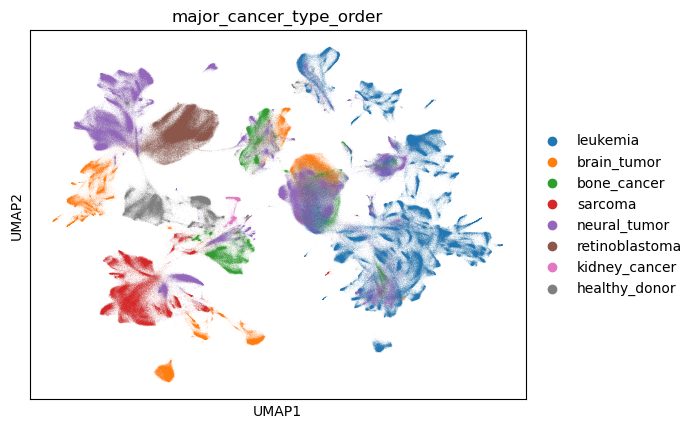

In [27]:
import pandas as pd

major_cancer_type_order = ['leukemia', 'brain_tumor', 'bone_cancer', 'sarcoma', 'neural_tumor', 'retinoblastoma', 'kidney_cancer', 'healthy_donor']

adata_annotated_unknown.obs['major_cancer_type_order'] = pd.Categorical(
    values=adata_annotated_unknown.obs.major_cancer_type, categories=major_cancer_type_order, ordered=True
)

sc.pl.umap(
    adata_annotated_unknown,
    color=['major_cancer_type_order']
)

/home/s4543064/miniforge3/envs/scvi_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/s4543064/miniforge3/envs/scvi_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


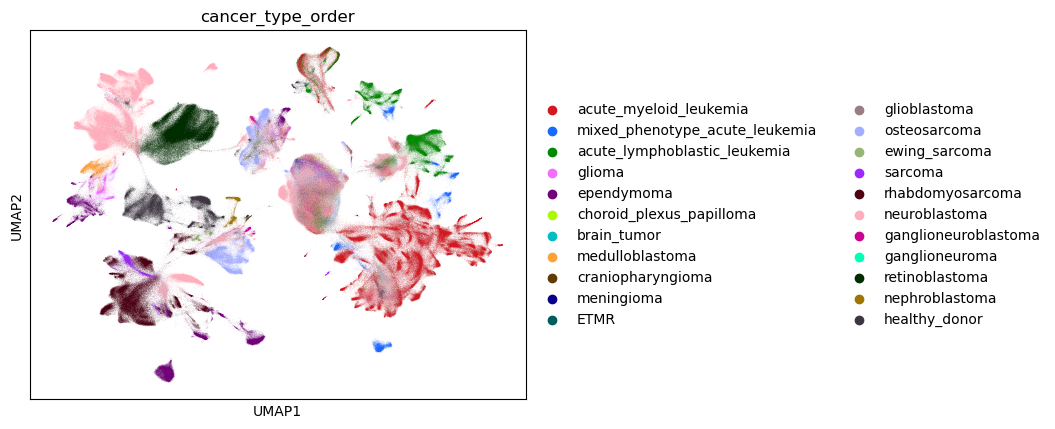

In [7]:
cancer_type_order = [
    'acute_myeloid_leukemia',
    'mixed_phenotype_acute_leukemia',
    'acute_lymphoblastic_leukemia',
    'glioma',
    'ependymoma',
    'choroid_plexus_papilloma',
    'brain_tumor',
    'medulloblastoma',
    'craniopharyngioma',
    'meningioma',
    'ETMR',
    'glioblastoma',
    'osteosarcoma',
    'ewing_sarcoma',
    'sarcoma',
    'rhabdomyosarcoma',
    'neuroblastoma',
    'ganglioneuroblastoma',
    'ganglioneuroma',
    'retinoblastoma',
    'nephroblastoma',
    'healthy_donor'
]

adata_annotated_unknown.obs['cancer_type_order'] = pd.Categorical(
    values=adata_annotated_unknown.obs.cancer_type, categories=cancer_type_order, ordered=True
)

sc.pl.umap(
    adata_annotated_unknown,
    color=['cancer_type_order']
)

/home/s4543064/miniforge3/envs/scvi_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/s4543064/miniforge3/envs/scvi_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


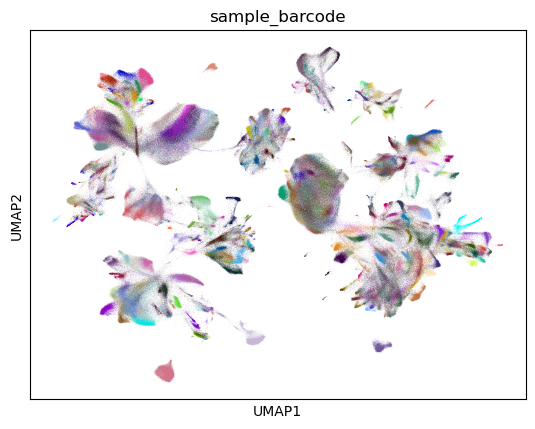

In [23]:
# Generate plots for pre-integration
sc.pl.umap(
    adata_annotated_unknown,
    color=['sample_barcode'],
    legend_loc=None,
)

In [25]:
# Save the updated pre-integration meta adata
adata_annotated_unknown.write_h5ad('/scratch/user/s4543064/Xiaohan_Summer_Research/write/08_all_cancer_clean/all_cancer_meta_anndata_scVI_pca_cluster_celltypist_high.h5ad', compression='gzip')

In [2]:
# Load the updated pre-integration meta adata
adata_annotated_unknown = sc.read_h5ad('/scratch/user/s4543064/Xiaohan_Summer_Research/write/08_all_cancer_clean/all_cancer_meta_anndata_scVI_pca_cluster_celltypist_high.h5ad')

In [3]:
# Update the cancer type info to the post-integration meta adata
post = sc.read_h5ad('/scratch/user/s4543064/Xiaohan_Summer_Research/write/08_all_cancer_clean/all_cancer_meta_anndata_scVI_celltypist_high.h5ad')
post 

AnnData object with n_obs × n_vars = 1300958 × 7662
    obs: 'cancer_type', 'dataset', 'tissue', 'uni_barcode', 'disease_progression', 'sample_barcode', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'filter_rna', 'cell_type_from_paper', 'malignant_from_paper', 'age_months', 'age', 'sex', 'recurrent', 'cancer_subtype', 'metastatic', '_scvi_batch', '_scvi_labels', 'leiden_scVI', 'major_cancer_type', 'major_cancer_type_order', 'cancer_type_order', 'celltypist_predicted_labels', 'celltypist_over_clustering', 'celltypist_majority_voting', 'celltypist_conf_score'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'cancer_type_colors', 'cancer_type_order_colors', 'celltypist_majority_voting_colors', 'celltypist_predicted_labels_colors', 'hvg', 'leiden', 'leiden_scVI_colors', 'major_cancer_type_order_colors', 'neighbors', 'pca', 'sample_barcode_colors', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    obsp: 'connectivities', 'dista

In [4]:
postx = post.copy()

/home/s4543064/miniforge3/envs/scvi_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/s4543064/miniforge3/envs/scvi_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


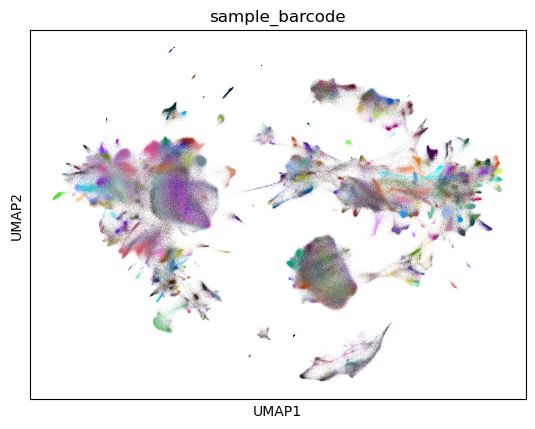

In [28]:
sc.pl.umap(
    postx,
    color=['sample_barcode'],
    legend_loc=None
)

In [9]:
postx.obs['major_cancer_type'] = adata_annotated_unknown.obs['major_cancer_type']
postx.obs['major_cancer_type_order'] = adata_annotated_unknown.obs['major_cancer_type_order']
postx.obs['cancer_type'] = adata_annotated_unknown.obs['cancer_type']
postx.obs['cancer_type_order'] = adata_annotated_unknown.obs['cancer_type_order']

/home/s4543064/miniforge3/envs/scvi_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/s4543064/miniforge3/envs/scvi_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


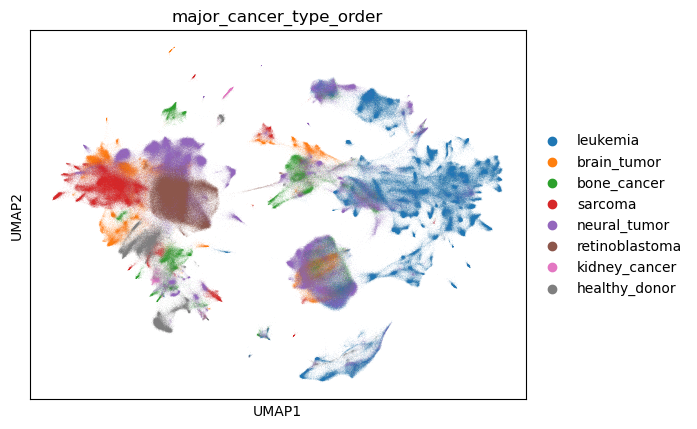

/home/s4543064/miniforge3/envs/scvi_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/s4543064/miniforge3/envs/scvi_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


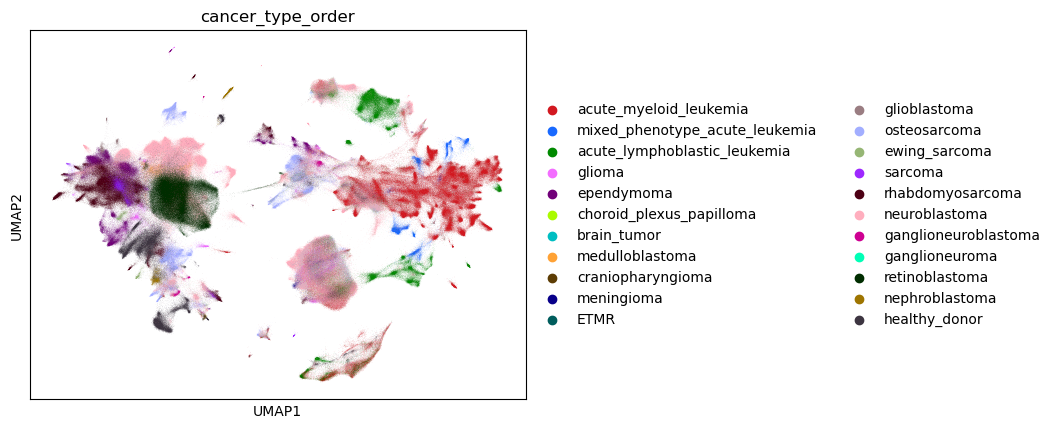

In [10]:
sc.pl.umap(
    postx,
    color=['major_cancer_type_order']
)

sc.pl.umap(
    postx,
    color=['cancer_type_order'],
)

In [11]:
# Save the updated post-integration meta adata
postx.write_h5ad('/scratch/user/s4543064/Xiaohan_Summer_Research/write/08_all_cancer_clean/all_cancer_meta_anndata_scVI_celltypist_high.h5ad', compression='gzip')

/home/s4543064/miniforge3/envs/scvi_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/s4543064/miniforge3/envs/scvi_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


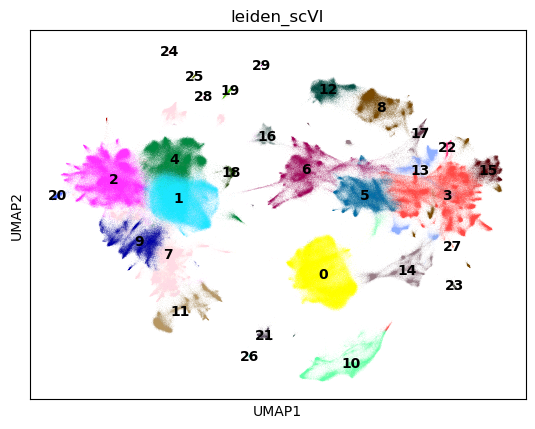

In [13]:
sc.pl.umap(
    postx,
    color=['leiden_scVI'],
    legend_loc='on data',
)

## 2. Load the necesssary variables for immune cell annotations

In [3]:
adata_annotated_unknown.obs['filtered_cell_labels'].value_counts()

filtered_cell_labels
Unknown                       1210714
T cells                         64633
B cells                         14622
Macrophages                      6395
Monocytes                        2784
Double-positive thymocytes       1387
Plasma cells                      160
ILC                               158
Double-negative thymocytes         98
DC                                  4
pDC                                 3
Name: count, dtype: int64

In [4]:
cell_labels = adata_annotated_unknown.obs['filtered_cell_labels'].unique()
cell_labels

['Unknown', 'T cells', 'B cells', 'Double-positive thymocytes', 'Monocytes', ..., 'Plasma cells', 'ILC', 'Double-negative thymocytes', 'pDC', 'DC']
Length: 11
Categories (11, object): ['B cells', 'DC', 'Double-negative thymocytes', 'Double-positive thymocytes', ..., 'Plasma cells', 'T cells', 'Unknown', 'pDC']

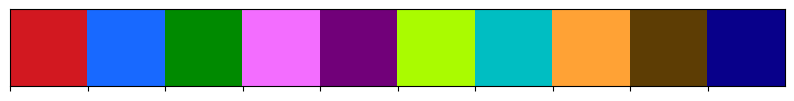

In [5]:
glasbey_palette = glasbey.create_palette(palette_size=10)
sns.palplot(glasbey_palette)

In [6]:
my_palette = {'Unknown': '#ecf0f1'}

count = 0
for cell_type in cell_labels:
    if cell_type not in my_palette:
        my_palette[cell_type] = glasbey_palette[count]
        count += 1

In [7]:
my_palette

{'Unknown': '#ecf0f1',
 'T cells': '#d21820',
 'B cells': '#1869ff',
 'Double-positive thymocytes': '#008a00',
 'Monocytes': '#f36dff',
 'Macrophages': '#710079',
 'Plasma cells': '#aafb00',
 'ILC': '#00bec2',
 'Double-negative thymocytes': '#ffa235',
 'pDC': '#5d3d04',
 'DC': '#08008a'}

In [8]:
immune_cells = cell_labels.tolist()
immune_cells.remove('Unknown')
immune_cells

['T cells',
 'B cells',
 'Double-positive thymocytes',
 'Monocytes',
 'Macrophages',
 'Plasma cells',
 'ILC',
 'Double-negative thymocytes',
 'pDC',
 'DC']

## 2. Compute the immune cell composition on the cancer-basis

/scratch/temp/9234550/ipykernel_3685491/3848708687.py:15: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle, color in zip(custom_legend.legendHandles, colors):


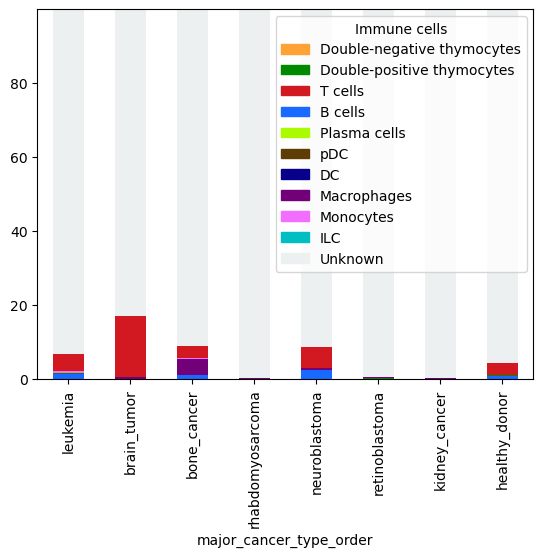

In [70]:
# Immune cell composition for each major cancer type
df = adata_annotated_unknown.obs
df2 = pd.crosstab(df['major_cancer_type_order'], df['filtered_cell_labels']).apply(lambda r: r/r.sum() * 100, axis = 1)
ax = df2.plot.bar(stacked=True, color=[my_palette[cell] for cell in df2.columns])

# Custom the legend order
handles, labels = ax.get_legend_handles_labels()
order = [2, 3, 8, 0, 7, 10, 1, 5, 6, 4, 9]
custom_legend = ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order], loc='upper right', title='Immune cells')

# Custom the legend color
colors = ['#ffa235', '#008a00', '#d21820', '#1869ff', '#aafb00', '#5d3d04', '#08008a', '#710079', '#f36dff', '#00bec2', '#ecf0f1']
for handle, color in zip(custom_legend.legendHandles, colors):
    handle.set_color(color)

plt.show()


/scratch/temp/9269086/ipykernel_1316120/2680062720.py:19: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle, color in zip(custom_legend.legendHandles, colors):


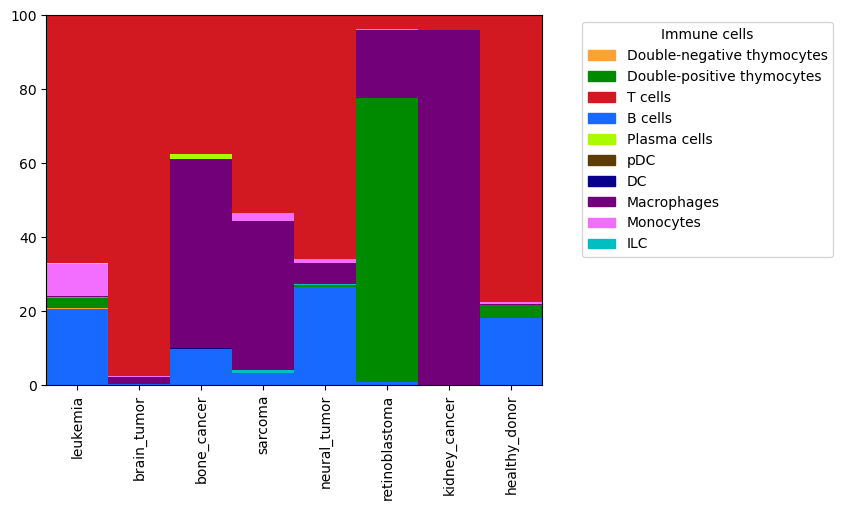

In [34]:
# What if we exclude the unknown celss

# Immune cell composition for each major cancer type
df = adata_annotated_unknown.obs[adata_annotated_unknown.obs['filtered_cell_labels'] != 'Unknown']
df2 = pd.crosstab(df['major_cancer_type_order'], df['filtered_cell_labels']).apply(lambda r: r/r.sum() * 100, axis = 1)
ax = df2.plot.bar(stacked=True, color=[my_palette[cell] for cell in df2.columns], width=1)

# Custom the legend order
handles, labels = ax.get_legend_handles_labels()
order = [2, 3, 8, 0, 7, 9, 1, 5, 6, 4]
custom_legend = ax.legend(
    [handles[idx] for idx in order], [labels[idx] for idx in order], 
    loc='upper right', title='Immune cells',
    bbox_to_anchor=(1.6, 1)
)

# Custom the legend color
colors = ['#ffa235', '#008a00', '#d21820', '#1869ff', '#aafb00', '#5d3d04', '#08008a', '#710079', '#f36dff', '#00bec2', '#ecf0f1']
for handle, color in zip(custom_legend.legendHandles, colors):
    handle.set_color(color)

# Remove white space at the top of the chart
ax.set_ylim(top=100)

# Remove white space between y-axis and the first bar
ax.set_xlim(left=-0.5)  # Adjust the value as needed

# Remove white space at the end of the chart
ax.set_xlim(right=len(df2)-0.5)

# Remove the title of the whole plot
plt.gca().set_xlabel('')

plt.show()

/scratch/temp/9269086/ipykernel_1316120/1573950719.py:17: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle, color in zip(custom_legend.legendHandles, colors):


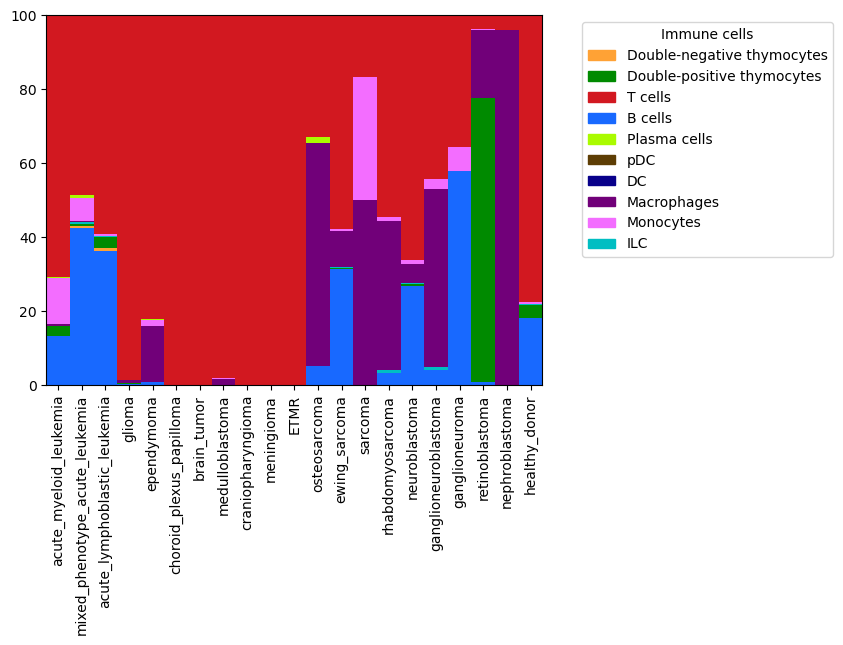

In [35]:
# Immune cell composition for each cancer type
df = adata_annotated_unknown.obs[adata_annotated_unknown.obs['filtered_cell_labels'] != 'Unknown']
df2 = pd.crosstab(df['cancer_type_order'], df['filtered_cell_labels']).apply(lambda r: r/r.sum() * 100, axis = 1)
ax = df2.plot.bar(stacked=True, color=[my_palette[cell] for cell in df2.columns], width=1)

# Custom the legend order
handles, labels = ax.get_legend_handles_labels()
order = [2, 3, 8, 0, 7, 9, 1, 5, 6, 4]
custom_legend = ax.legend(
    [handles[idx] for idx in order], [labels[idx] for idx in order], 
    loc='upper right', title='Immune cells',
    bbox_to_anchor=(1.6, 1)
)

# Custom the legend color
colors = ['#ffa235', '#008a00', '#d21820', '#1869ff', '#aafb00', '#5d3d04', '#08008a', '#710079', '#f36dff', '#00bec2', '#ecf0f1']
for handle, color in zip(custom_legend.legendHandles, colors):
    handle.set_color(color)

# Remove white space at the top of the chart
ax.set_ylim(top=100)

# Remove white space between y-axis and the first bar
ax.set_xlim(left=-0.5)  # Adjust the value as needed

# Remove white space at the end of the chart
ax.set_xlim(right=len(df2)-0.5)

# Remove the title of the whole plot
plt.gca().set_xlabel('')

plt.show()


In [24]:
df = adata_annotated_unknown.obs[adata_annotated_unknown.obs['cancer_type_order'] == 'glioblastoma']
df2 = pd.crosstab(df['cancer_type_order'], df['filtered_cell_labels']).apply(lambda r: r/r.sum() * 100, axis = 1)
df2 # the cells from glioblastoma samples are all annotated as unknown

filtered_cell_labels,Unknown
cancer_type_order,
glioblastoma,100.0


## 3. Compute the immune cell composition on the sample-basis

In [9]:
filtered_cell_labels_order = ['Double-negative thymocytes', 'Double-positive thymocytes', 'T cells', 'B cells', 'Plasma cells', 
                              'pDC', 'DC', 'Macrophages', 'Monocytes', 'ILC', 'Unknown']

reference_position_map = {element: index for index, element in enumerate(filtered_cell_labels_order)}

leukemia

The sample number:  158

/scratch/temp/9269086/ipykernel_1316120/983463855.py:30: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle, color in zip(custom_legend.legendHandles, colors):


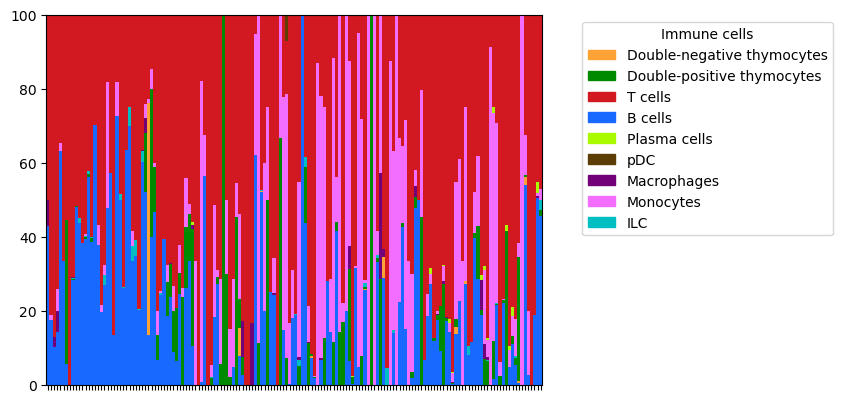

brain_tumor

The sample number:  108

/scratch/temp/9269086/ipykernel_1316120/983463855.py:30: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle, color in zip(custom_legend.legendHandles, colors):


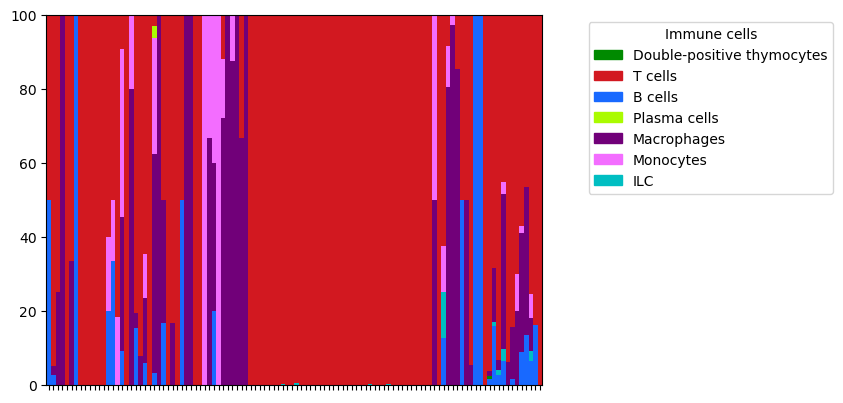

bone_cancer

The sample number:  32

/scratch/temp/9269086/ipykernel_1316120/983463855.py:30: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle, color in zip(custom_legend.legendHandles, colors):


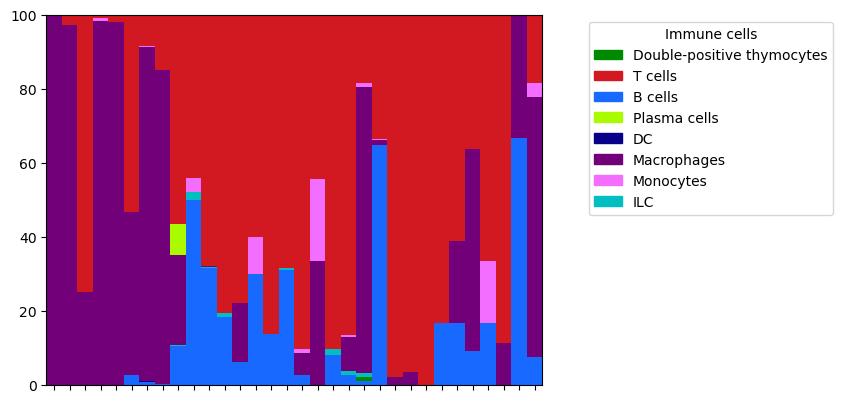

sarcoma

The sample number:  20

/scratch/temp/9269086/ipykernel_1316120/983463855.py:30: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle, color in zip(custom_legend.legendHandles, colors):


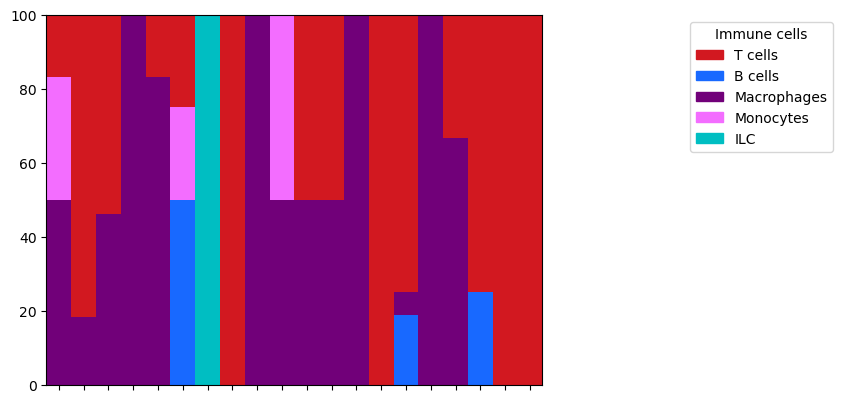

neural_tumor

The sample number:  63

/scratch/temp/9269086/ipykernel_1316120/983463855.py:30: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle, color in zip(custom_legend.legendHandles, colors):


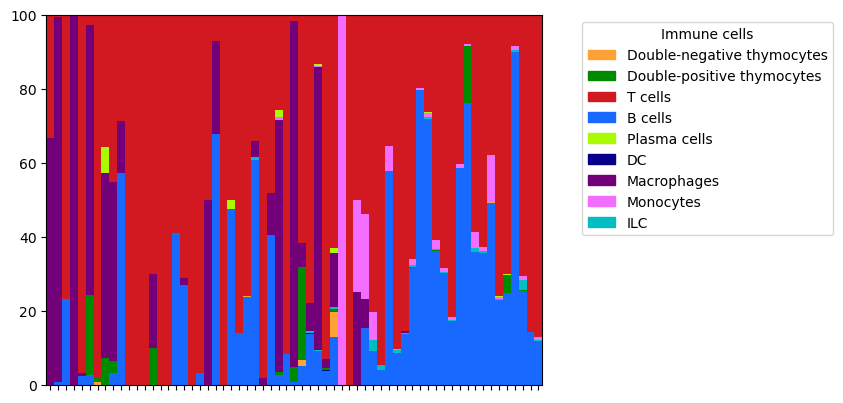

retinoblastoma

The sample number:  16

/scratch/temp/9269086/ipykernel_1316120/983463855.py:30: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle, color in zip(custom_legend.legendHandles, colors):


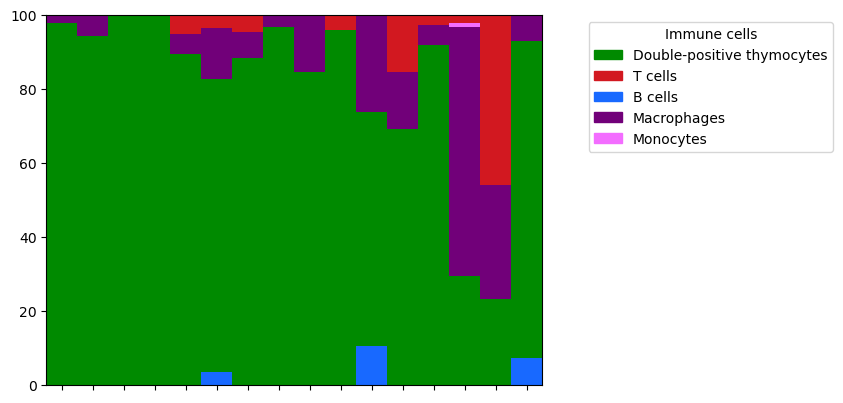

kidney_cancer

The sample number:  2

/scratch/temp/9269086/ipykernel_1316120/983463855.py:30: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle, color in zip(custom_legend.legendHandles, colors):


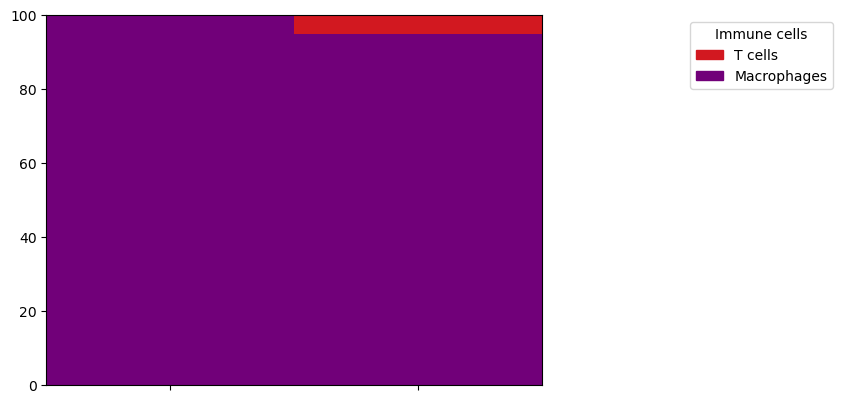

healthy_donor

The sample number:  11

/scratch/temp/9269086/ipykernel_1316120/983463855.py:30: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle, color in zip(custom_legend.legendHandles, colors):


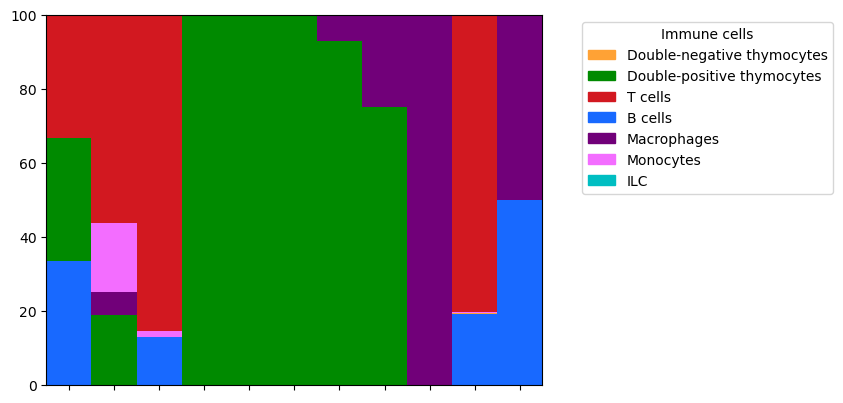

In [32]:
# Immune cell composition for each sample

for cancer in major_cancer_type_order:
    print(cancer)

    df = adata_annotated_unknown.obs.loc[(adata_annotated_unknown.obs['filtered_cell_labels'] != 'Unknown') & 
                                        (adata_annotated_unknown.obs['major_cancer_type'] == cancer)]
    df2 = pd.crosstab(df['sample_barcode'], df['filtered_cell_labels']).apply(lambda r: r/r.sum() * 100, axis = 1)
    ax = df2.plot.bar(stacked=True, color=[my_palette[cell] for cell in df2.columns], width=1)

    sample_number = len(df2)
    print("The sample number: ", sample_number)

    # Custom the legend order
    handles, labels = ax.get_legend_handles_labels()

    actual_cell_labels_order = df2.columns.tolist()
    actual_position_map = {element: index for index, element in enumerate(actual_cell_labels_order)}
    sorted_cell_labels = sorted(actual_cell_labels_order, key=lambda x: reference_position_map.get(x))
    order = [actual_position_map[cell] for cell in sorted_cell_labels]
    colors = [my_palette[cell] for cell in sorted_cell_labels]

    custom_legend = ax.legend(
        [handles[idx] for idx in order], [labels[idx] for idx in order], 
        loc='upper right', title='Immune cells',
        bbox_to_anchor=(1.6, 1)
    )

    # Custom the legend color
    for handle, color in zip(custom_legend.legendHandles, colors):
        handle.set_color(color)

    # Remove x-axis labels while keeping ticks
    ax.set_xticklabels([])

    # Remove white space at the top of the chart
    ax.set_ylim(top=100)

    # Remove white space between y-axis and the first bar
    ax.set_xlim(left=-0.5)  # Adjust the value as needed

    # Remove white space at the end of the chart
    ax.set_xlim(right=sample_number-0.5)

    # Remove the title of the whole plot
    plt.gca().set_xlabel('')

    plt.show()

acute_myeloid_leukemia

The sample number:  112

/scratch/temp/9319863/ipykernel_3442620/1343144722.py:32: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle, color in zip(custom_legend.legendHandles, colors):


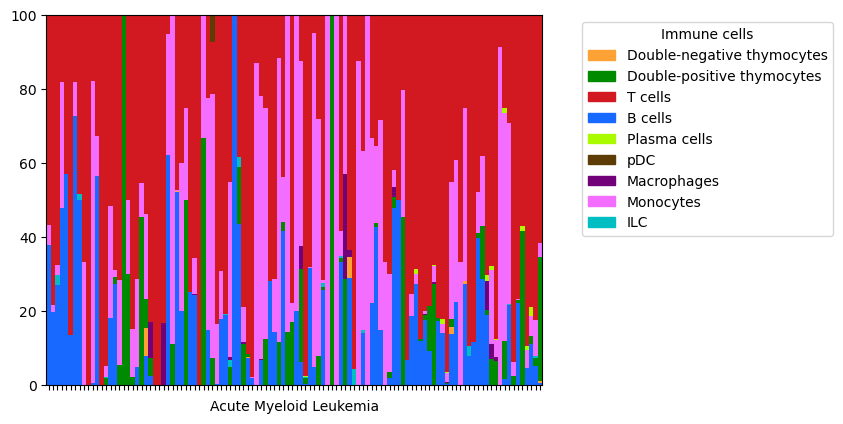

mixed_phenotype_acute_leukemia

The sample number:  7

/scratch/temp/9319863/ipykernel_3442620/1343144722.py:32: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle, color in zip(custom_legend.legendHandles, colors):


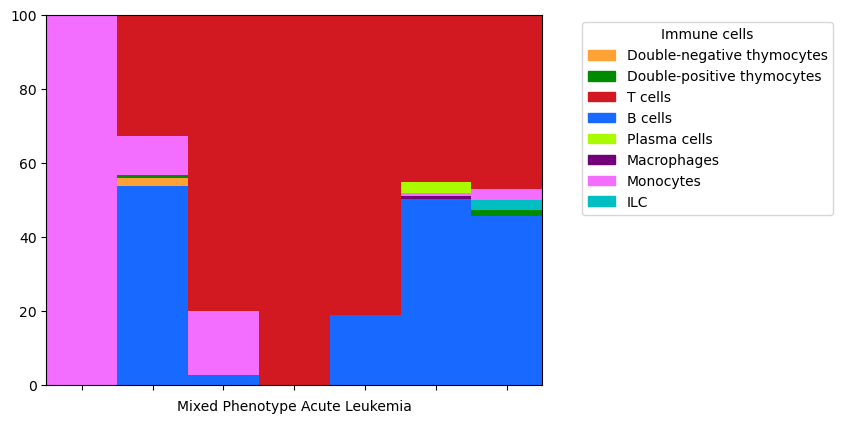

acute_lymphoblastic_leukemia

The sample number:  39

/scratch/temp/9319863/ipykernel_3442620/1343144722.py:32: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle, color in zip(custom_legend.legendHandles, colors):


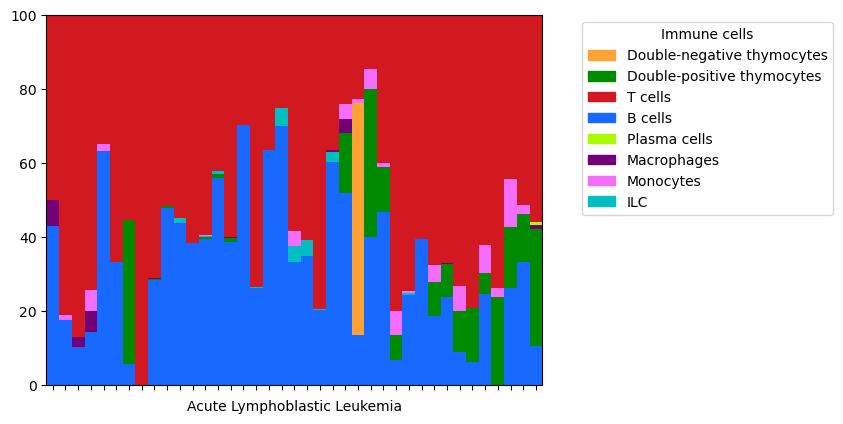

In [15]:
# Plot the immune cell composition for each cancer_type in leukemia

leukemias = ['acute_myeloid_leukemia', 'mixed_phenotype_acute_leukemia', 'acute_lymphoblastic_leukemia']

for cancer_type in leukemias:
    print(cancer_type)

    df = adata_annotated_unknown.obs.loc[(adata_annotated_unknown.obs['filtered_cell_labels'] != 'Unknown') & 
                                        (adata_annotated_unknown.obs['cancer_type'] == cancer_type)]
    df2 = pd.crosstab(df['sample_barcode'], df['filtered_cell_labels']).apply(lambda r: r/r.sum() * 100, axis = 1)
    ax = df2.plot.bar(stacked=True, color=[my_palette[cell] for cell in df2.columns], width=1)

    sample_number = len(df2)
    print("The sample number: ", sample_number)

    # Custom the legend order
    handles, labels = ax.get_legend_handles_labels()

    actual_cell_labels_order = df2.columns.tolist()
    actual_position_map = {element: index for index, element in enumerate(actual_cell_labels_order)}
    sorted_cell_labels = sorted(actual_cell_labels_order, key=lambda x: reference_position_map.get(x))
    order = [actual_position_map[cell] for cell in sorted_cell_labels]
    colors = [my_palette[cell] for cell in sorted_cell_labels]

    custom_legend = ax.legend(
        [handles[idx] for idx in order], [labels[idx] for idx in order], 
        loc='upper right', title='Immune cells',
        bbox_to_anchor=(1.6, 1)
    )

    # Custom the legend color
    for handle, color in zip(custom_legend.legendHandles, colors):
        handle.set_color(color)

    # Remove x-axis labels while keeping ticks
    ax.set_xticklabels([])

    # Remove white space at the top of the chart
    ax.set_ylim(top=100)

    # Remove white space between y-axis and the first bar
    ax.set_xlim(left=-0.5)  # Adjust the value as needed

    # Remove white space at the end of the chart
    ax.set_xlim(right=sample_number-0.5)

    # Remove the title of the whole plot
    plt.gca().set_xlabel(cancer_type.replace('_', ' ').title())

    plt.show()